![image](how.png)

**"Should I Stay or Should i Go (from the Hospital)"**

In [1]:
import pandas as pd
import numpy as np
#from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\Roxan\\OneDrive\\Documentos\\My_map_2\\Data-science-bootcamp\\Curso\\week_9\\day5\\train_set.csv") 

1. Understanding and cleaning the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  int64  
 1   1       100000 non-null  int64  
 2   2       100000 non-null  object 
 3   3       100000 non-null  int64  
 4   4       100000 non-null  object 
 5   5       100000 non-null  int64  
 6   6       100000 non-null  object 
 7   7       100000 non-null  object 
 8   8       100000 non-null  object 
 9   9       99967 non-null   float64
 10  10      100000 non-null  int64  
 11  11      98517 non-null   float64
 12  12      100000 non-null  object 
 13  13      100000 non-null  object 
 14  14      100000 non-null  int64  
 15  15      100000 non-null  object 
 16  16      100000 non-null  float64
 17  17      100000 non-null  object 
dtypes: float64(3), int64(6), object(9)
memory usage: 13.7+ MB


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10
1,159472,23,a,6,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30
2,309765,2,c,5,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20
3,279614,32,f,9,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60
4,147791,14,a,1,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60


In [5]:
# PROBLEMA DE CLASIFICACIÓN: target column
df["17"].value_counts()

21-30                 27452
11-20                 24476
31-40                 17311
51-60                 10984
0-10                   7427
41-50                  3668
71-80                  3297
More than 100 Days     2150
81-90                  1470
91-100                  908
61-70                   857
Name: 17, dtype: int64

In [6]:
# esto es necesario para evitar futuros errores pero si quitaráis las columnas con Nan no haría falta
# Nan no vale pero 0 sí
#df = df.dropna()
# esto quita filas y por tanto no se lo podremos aplicar al dataset de predicción

In [7]:
# quitad la primera columna porque corresponde con el case_id y por tanto no le servirá al modelo para aprender...
# quitar otras columnas es decisión vuestra como futuros data scientists 

In [8]:
df.drop(["0", "10", "11"],1, inplace=True )

In [9]:
null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9     33
12     0
13     0
14     0
15     0
16     0
17     0
dtype: int64


In [10]:
df["9"].value_counts()  #column 9: Condition of Bed in the Ward, will fill nan with 0 as 1, 2, 3 and 4 already excist. 

2.0    38932
3.0    34548
4.0    18096
1.0     8391
Name: 9, dtype: int64

In [11]:
df["9"] = df["9"].fillna(value=0)

In [12]:
print("Data types and their frequency\n{}".format(df.dtypes.value_counts()))


Data types and their frequency
object     9
int64      4
float64    2
dtype: int64


In [13]:
#looking at the object columns specifically
object_columns_df = df.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

2              a
4              X
6     gynecology
7              R
8              F
12        Urgent
13      Moderate
15         21-30
17          0-10
Name: 0, dtype: object


In [11]:
cols = ['2', '4', '6', '7', '8', '12', '13', '15', '17']
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')

2 :
a    44909
b    21927
c    14346
e     7828
d     6416
f     3280
g     1294
Name: 2, dtype: int64 

4 :
X    41936
Y    38430
Z    19634
Name: 4, dtype: int64 

6 :
gynecology            78333
anesthesia             9262
radiotherapy           8909
TB & Chest disease     3105
surgery                 391
Name: 6, dtype: int64 

7 :
R    40300
Q    33325
S    24351
P     1565
T      456
U        3
Name: 7, dtype: int64 

8 :
F    35606
E    17259
D    16399
C    11163
B    10868
A     8705
Name: 8, dtype: int64 

12 :
Trauma       47537
Emergency    37287
Urgent       15176
Name: 12, dtype: int64 

13 :
Moderate    55260
Minor       26999
Extreme     17741
Name: 13, dtype: int64 

15 :
41-50     20115
31-40     20017
51-60     15194
21-30     12683
71-80     11272
61-70     10617
11-20      5327
81-90      2419
0-10       1926
91-100      430
Name: 15, dtype: int64 

17 :
21-30                 27452
11-20                 24476
31-40                 17311
51-60                 10984


In [14]:
from sklearn.preprocessing import LabelEncoder


In [13]:
df_test = df.copy()
objList = df_test.select_dtypes(include = "object").columns
print (objList)
le = LabelEncoder()

for feat in objList:
    df_test[feat] = le.fit_transform(df_test[feat].astype(str))


Index(['2', '4', '6', '7', '8', '12', '13', '15', '17'], dtype='object')


In [14]:
df_test

,1,2,3,4,5,6,7,8,9,12,13,14,15,16,17
0,6,0,6,0,2,2,2,5,4.0,2,2,2,2,2817.0,0
1,23,0,6,0,4,2,1,5,2.0,1,2,4,5,4498.0,2
2,2,2,5,2,2,1,3,5,3.0,2,2,2,7,4573.0,1
3,32,5,9,1,3,2,3,1,4.0,0,2,4,1,7202.0,5
4,14,0,1,0,3,2,3,4,2.0,2,2,2,5,3398.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12,0,9,1,3,2,2,1,3.0,0,2,6,5,3966.0,10
99996,28,1,11,0,2,2,2,5,2.0,2,2,3,2,4005.0,5
99997,6,0,6,0,3,2,1,5,3.0,1,1,2,3,5215.0,3
99998,32,5,9,1,2,2,3,1,4.0,1,2,3,4,5092.0,1


In [15]:
#seeing correlation
#finding correlated columns with target column
cor = df_test.corr()
cor_target = abs(cor["17"])
#relevant_features = cor_target[cor_target>0.3]
cor_target.sort_values(ascending=False)

17    1.000000
14    0.543491
7     0.187927
5     0.122707
15    0.090520
2     0.058781
16    0.056711
1     0.041750
6     0.033860
13    0.031951
9     0.029290
12    0.023269
4     0.011989
3     0.008060
8     0.005414
Name: 17, dtype: float64

In [8]:
df_data = df.drop("17", 1)

In [15]:
#selecting data 

df_data = df.drop("17", 1)
from sklearn.preprocessing import LabelEncoder

objList = df_data.select_dtypes(include = "object").columns
print (objList)
le = LabelEncoder()

for feat in objList:
    df_data[feat] = le.fit_transform(df_data[feat].astype(str))


Index(['2', '4', '6', '7', '8', '12', '13', '15'], dtype='object')


In [16]:
# target
target = df["17"]

le = preprocessing.LabelEncoder()
le_fit = le.fit(target)
target_encoded = le_fit.transform(target)

In [18]:
#om terug te gaan naar originele 
#target_original_values = le.inverse_transform(df["17"])

In [17]:
np.unique(target_encoded, return_counts=True) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 7427, 24476, 27452, 17311,  3668, 10984,   857,  3297,  1470,
          908,  2150], dtype=int64))

#### 1. Definir X e y

In [18]:
# coger las columnas 1, 3, 5, 9 tiene solo valor ilustrativo, NO LO COPIÉIS
X = df_data
y = target_encoded
X.shape

(100000, 14)

In [19]:
y.shape

(100000,)

#### 2. Dividir X_train, X_test, y_train, y_test

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [21]:
X_train

,1,2,3,4,5,6,7,8,9,12,13,14,15,16
51893,23,0,6,0,5,2,1,5,2.0,1,2,6,7,3437.0
36145,12,0,9,1,2,2,1,1,3.0,1,2,7,2,3523.0
63482,26,1,2,1,3,2,3,3,4.0,1,2,4,2,5070.0
73457,23,0,6,0,4,2,1,5,3.0,1,1,2,2,5234.0
66146,2,2,5,2,2,2,3,5,3.0,1,2,4,7,7980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30343,32,5,9,1,3,2,3,1,1.0,0,0,4,4,4207.0
22319,30,2,3,2,3,2,2,0,2.0,1,2,2,3,4744.0
87915,13,0,5,2,3,2,2,5,3.0,1,2,2,6,4642.0
54317,32,5,9,1,1,2,3,1,3.0,1,1,2,2,4524.0


[('KNN', KNeighborsClassifier()), ('LR', LogisticRegression()), ('SVM', SVC()), ('DTR', DecisionTreeRegressor()), ('RFC', RandomForestClassifier(n_estimators=10))]


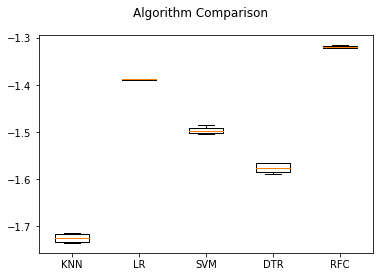

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
import matplotlib.pyplot as plt



# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVM', svm.SVC(kernel = 'rbf')))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFC', RandomForestClassifier(n_estimators = 10)))


# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
    kfold = model_selection.KFold(n_splits=4, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
from sklearn.model_selection import GridSearchCV
plt.show()

In [22]:
X_train_small = X_train[:4000]
y_train_small = y_train[:4000]

In [28]:
%%time 

from sklearn.model_selection import GridSearchCV

new_model = RandomForestClassifier()


param_grid = { 
    'n_estimators': [50, 100, 200],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [None,4,5,6],
    'criterion' :['gini', 'entropy']}

clf = GridSearchCV(new_model, param_grid=param_grid, n_jobs=-1, verbose=10

)

best_clf = clf.fit(X_train_small, y_train_small)
best_clf.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  

RandomForestClassifier(bootstrap=False, max_depth=6, max_features='log2',
                       n_estimators=200)

In [ ]:
RandomForestClassifier(n_estimators=200, bootstrap=False, criterion='entropy', max_depth=6,
                       max_features='log2')




param_grid = [ {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}]

In [25]:
y_train

array([7, 1, 8, ..., 5, 1, 5])

In [29]:
k_fold = KFold(n_splits=10, random_state=1)
val_score = []
train_score = []
# define the model
model = RandomForestClassifier(n_estimators=200, bootstrap=False, criterion='entropy', max_depth=6,
                       max_features='log2', n_jobs=-1, verbose=10)
for train, val in k_fold.split(X_train):
    # train the model
    model.fit(X_train[train], y_train[train])
    score_val = model.score(X_train[val], y_train[val])
    val_score.append(score_val)
    score_train = model.score(X_train[train], y_train[train])
    train_score.append(score_train)

KeyError: "None of [Int64Index([ 8000,  8001,  8002,  8003,  8004,  8005,  8006,  8007,  8008,\n             8009,\n            ...\n            79990, 79991, 79992, 79993, 79994, 79995, 79996, 79997, 79998,\n            79999],\n           dtype='int64', length=72000)] are in the [columns]"

#### 3. Asignar el modelo (vacío) a una variable
Aquí meteríais los parámetros

In [ ]:
k_fold = KFold(n_splits=10, random_state=1)
val_score = []
train_score = []
# define the model
model = RandomForestClassifier(n_estimators=200, bootstrap=False, criterion='entropy', max_depth=6,
                       max_features='log2', n_jobs=-1, verbose=10)

for train_index, test_index in k_fold.split(X_train):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train the model
    model = clf.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    #accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)

In [29]:
#model = linear_model.LogisticRegression()
#model = LogisticRegression()

#### 4. Entrenar el modelo con X_train, y_train

In [23]:
model = RandomForestClassifier(n_estimators=200, bootstrap=False, criterion='entropy', max_depth=6,
                       max_features='log2', n_jobs=-1)

In [24]:
model.fit(X_train, y_train)

MemoryError: Unable to allocate 625. KiB for an array with shape (80000,) and data type int64

#### 5. Predecir con el modelo ya entrenado con X_test/to_pred

In [28]:
predictions = model.predict(X_test)
print(predictions)

[2 2 2 ... 2 2 1]


In [ ]:
#target_original_values = le.inverse_transform(df["17"])

#### 6. Sacar métricas, valorar el modelo 

In [29]:
model.score(X_test,y_test)

0.3863

## Una vez listo el modelo, toca predecir con el dataset de predicción 

In [30]:
full_to_pred = pd.read_csv("C:\\Users\\Roxan\\OneDrive\\Documentos\\My_map_2\\Data-science-bootcamp\\Curso\\week_9\\day5\\test_set.csv")



In [31]:
full_to_pred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,314114,19,a,7,Y,4,gynecology,S,C,2.0,59278,8.0,Emergency,Minor,2,41-50,4778.0
1,208989,15,c,5,Z,3,gynecology,S,F,2.0,102253,15.0,Trauma,Moderate,3,31-40,5734.0
2,305872,17,e,1,X,4,gynecology,R,E,4.0,5828,4.0,Emergency,Minor,3,71-80,5064.0
3,266099,3,c,3,Z,4,TB & Chest disease,R,A,2.0,56642,9.0,Urgent,Extreme,4,31-40,3254.0
4,13228,6,a,6,X,4,gynecology,R,F,1.0,116266,8.0,Emergency,Minor,3,21-30,4639.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133739,318155,18,d,13,Y,6,anesthesia,Q,B,3.0,123269,25.0,Urgent,Minor,4,51-60,5089.0
133740,144850,27,a,7,Y,2,gynecology,S,C,2.0,1293,8.0,Emergency,Moderate,3,61-70,6713.0
133741,180676,16,c,3,Z,3,gynecology,R,A,3.0,112921,5.0,Trauma,Minor,3,31-40,5326.0
133742,39933,28,b,11,X,4,gynecology,R,F,2.0,585,2.0,Trauma,Extreme,2,31-40,7072.0


In [32]:
to_pred = full_to_pred.copy()
to_pred.drop(["0", "10", "11"],1, inplace=True )
to_pred["9"] = to_pred["9"].fillna(value=0)

In [33]:
objList = to_pred.select_dtypes(include = "object").columns
print (objList)
le = LabelEncoder()

for feat in objList:
    to_pred[feat] = le.fit_transform(to_pred[feat].astype(str))

Index(['2', '4', '6', '7', '8', '12', '13', '15'], dtype='object')


In [34]:
to_pred

,1,2,3,4,5,6,7,8,9,12,13,14,15,16
0,19,0,7,1,4,2,3,2,2.0,0,1,2,4,4778.0
1,15,2,5,2,3,2,3,5,2.0,1,2,3,3,5734.0
2,17,4,1,0,4,2,2,4,4.0,0,1,3,7,5064.0
3,3,2,3,2,4,0,2,0,2.0,2,0,4,3,3254.0
4,6,0,6,0,4,2,2,5,1.0,0,1,3,2,4639.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133739,18,3,13,1,6,1,1,1,3.0,2,1,4,5,5089.0
133740,27,0,7,1,2,2,3,2,2.0,0,2,3,6,6713.0
133741,16,2,3,2,3,2,2,0,3.0,1,1,3,3,5326.0
133742,28,1,11,0,4,2,2,5,2.0,1,0,2,3,7072.0


In [37]:
# la primera columna es id_case, deberéis quitarla para hacer la predicción si la habéis quitado para entrenar
# pero guardarla para incluirla en la submission

# IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO
# SI EL ARRAY CON EL QUE HICISTEIS .fit() ERA DE 4 COLUMNAS, PARA .predict() DEBEN SER LAS MISMAS
# SI AL ARRAY CON EL QUE HICISTEIS .fit() LO NORMALIZASTEIS, PARA .predict() DEBÉIS NORMALIZARLO
# TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 133744 FILAS
# SI O SI


In [17]:
# para evitar este error ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
#to_pred = to_pred.fillna(0)

In [35]:
predictions = model.predict(to_pred)
predictions_submit = le.inverse_transform(predictions)
predictions_submit

ValueError: y contains previously unseen labels: [10]

In [37]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [38]:
np.unique(predictions)

array([ 0,  1,  2,  3,  5, 10])

In [54]:
submission = pd.DataFrame({"id": full_to_pred["0"], "days": predictions_submit})
submission

,id,days
0,314114,11-20
1,208989,21-30
2,305872,21-30
3,266099,31-40
4,13228,11-20
...,...,...
133739,318155,11-20
133740,144850,21-30
133741,180676,21-30
133742,39933,11-20


In [55]:
sample = pd.read_csv("C:\\Users\\Roxan\\OneDrive\\Documentos\My_map_2\\Data-science-bootcamp\\Curso\\week_9\\day5\\sample_submission.csv")

In [56]:
sample.shape

(133744, 2)

In [ ]:
sample.

In [57]:
if submission.shape == sample.shape:
    if submission.columns.all() == sample.columns.all():
        if submission.id.all() == sample.id.all():
            print("you're ready to submit!")
            submission.to_csv("to_submit.csv", index = False)
            # ¡¡¡¡¡¡¡ADD INDEX = FALSE!!!!!!!!!

you're ready to submit!
